In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 1000

# Generate unique customer IDs
customer_ids = [f"CUST_{i:04d}" for i in range(1, num_samples + 1)]

# Generate Age (18 to 80)
ages = np.random.randint(18, 80, num_samples)

# Generate Annual Income (20K to 150K) with some correlation to Age
annual_income = ages * 1000 + np.random.normal(30000, 15000, num_samples)  # Slight linear relation
annual_income = np.clip(annual_income, 20000, 150000)  # Ensure range

# Generate Policy Count (1 to 5) with slight correlation to Age
policy_count = (ages / 20) + np.random.randint(1, 3, num_samples)
policy_count = np.clip(policy_count.astype(int), 1, 5)

# Generate Total Premium Paid (Linear with Income)
total_premium_paid = annual_income * 0.05 + np.random.normal(1000, 500, num_samples)

# Generate Claim Frequency (Inverse relation with Policy Upgrades)
claim_frequency = np.random.randint(0, 5, num_samples)

# Generate Policy Upgrades (More income, more upgrades; More claims, fewer upgrades)
policy_upgrades = (annual_income / 30000) - (claim_frequency * 0.5) + np.random.randint(0, 3, num_samples)
policy_upgrades = np.clip(policy_upgrades.astype(int), 0, 5)

# Create DataFrame
df = pd.DataFrame({
    "Customer_ID": customer_ids,
    "Age": ages,
    "Annual_Income": annual_income.round(2),
    "Policy_Count": policy_count,
    "Total_Premium_Paid": total_premium_paid.round(2),
    "Claim_Frequency": claim_frequency,
    "Policy_Upgrades": policy_upgrades
})



# Save to CSV
df.to_csv(r"..\Data\5_Unsupervised_customer_data.csv", index=False)


**Explanation of Linear Relationships**

Annual Income ≈ Age × 1000 (older customers generally have higher income).

Total Premium Paid ≈ Annual Income × 0.05 (higher earners pay higher premiums).

Policy Count ≈ Age / 20 (older customers tend to have more policies).

Policy Upgrades ≈ (Annual Income / 30000) - (Claim Frequency × 0.5) (higher income → more upgrades; more claims → fewer upgrades).

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv(r'..\Data\5_Unsupervised_customer_data.csv')

In [5]:
df.head()

,Customer_ID,Age,Annual_Income,Policy_Count,Total_Premium_Paid,Claim_Frequency,Policy_Upgrades
0,CUST_0001,56,106585.67,4,6382.37,2,3
1,CUST_0002,69,88833.21,5,5206.88,3,1
2,CUST_0003,46,93302.98,4,5567.50,3,3
3,CUST_0004,32,56374.84,3,3971.07,0,3
4,CUST_0005,60,79587.81,5,3728.49,0,3


# DATA PREPROCESSING

NULL VALUES

In [5]:
df.isnull().sum()

Customer_ID           0
Age                   0
Annual_Income         0
Policy_Count          0
Total_Premium_Paid    0
Claim_Frequency       0
Policy_Upgrades       0
dtype: int64

**OUTLIERS**

Why Check for Outliers?

Impact on Clustering Algorithms

Algorithms like K-Means are sensitive to outliers because they use the mean to determine cluster centers.

DBSCAN can handle outliers better since it labels them as noise, but excessive noise can still affect results.

Distortion of Distance-Based Methods

Many clustering techniques (e.g., K-Means, Hierarchical Clustering) rely on distance metrics (Euclidean, Manhattan, etc.).

Outliers can artificially expand cluster boundaries, leading to incorrect assignments.

Better Customer Segmentation

If your dataset contains customers with extremely high incomes, purchases, or visit frequencies, they might be outliers.

Removing or handling them separately can improve cluster quality and insight

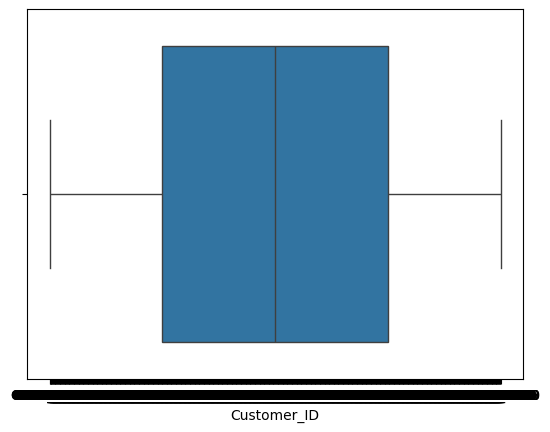

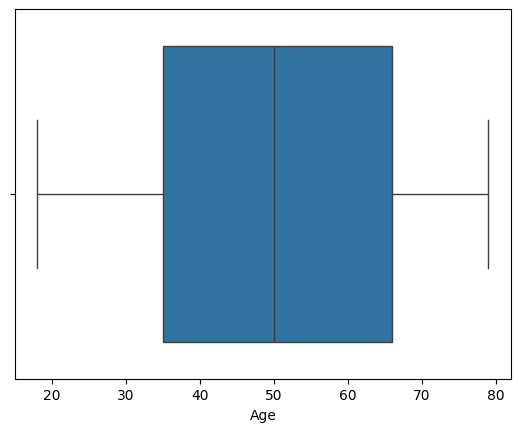

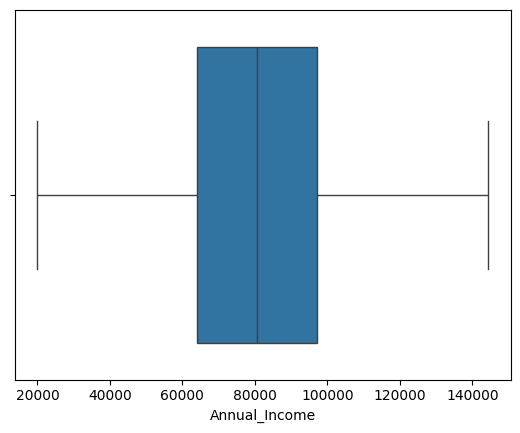

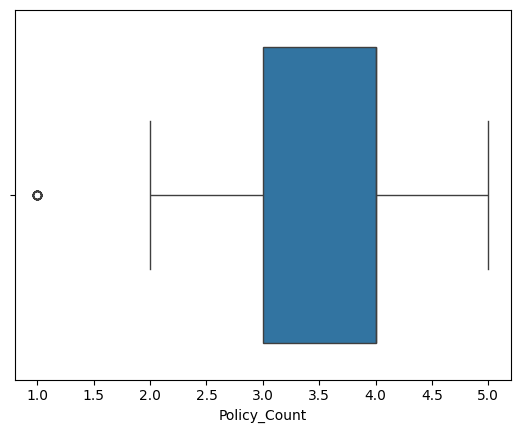

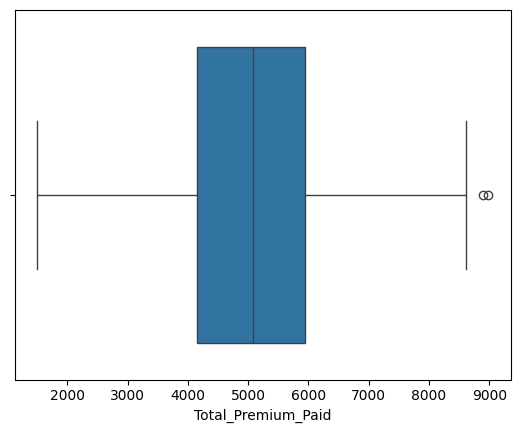

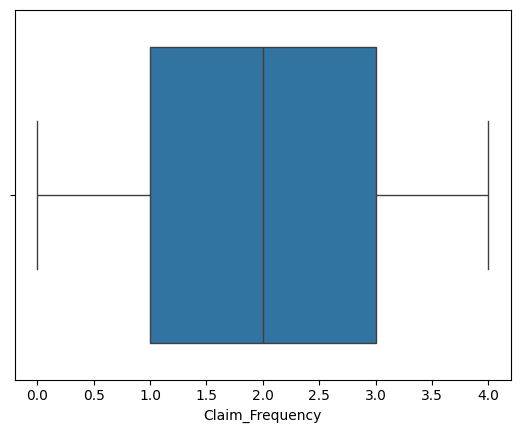

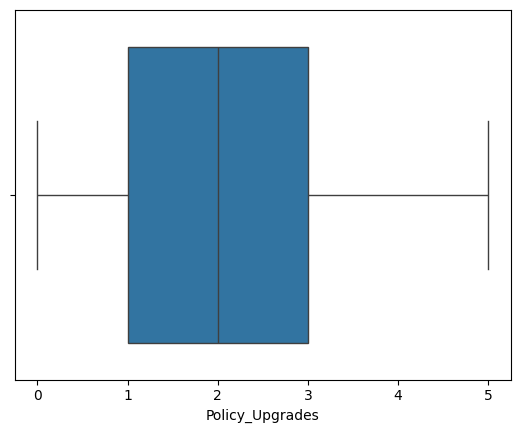

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in df.columns:
# Boxplot to visualize outliers
    sns.boxplot(x=df[i])
    plt.show()

THERE IS OUTLIERS IN POLICYCOUNT, TOTAL PREMIUM PAID

In [7]:
df['Policy_Count'].describe()

count    1000.000000
mean        3.515000
std         1.009353
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Policy_Count, dtype: float64

with describing there is no problem with policy_count

In [8]:
df['Total_Premium_Paid'].describe()

count    1000.000000
mean     5067.657460
std      1310.293359
min      1502.500000
25%      4148.317500
50%      5074.255000
75%      5950.207500
max      8983.790000
Name: Total_Premium_Paid, dtype: float64

Mean vs. Max 

 If the mean is much lower than the max, it suggests that a few extremely high values (outliers) are pulling the average up.

eg., The mean income is 52,000, but the maximum is 620,000 → possible high-income outliers.

If the mean is close to the max, it suggests a more normally distributed dataset.

Mean vs. Median (50% percentile)

Use df.describe() to check if the median (50%) is much lower than the mean.

If so, this confirms right-skewed data (outliers with high values).

eg,. The median (45,000) is much lower than the mean (52,000), confirming income outliers

Why Does This Happen?

Income: A few customers might have extremely high incomes compared to the general population.

C:\Users\firea\AppData\Local\Temp\ipykernel_408\4156611568.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Total_Premium_Paid'])


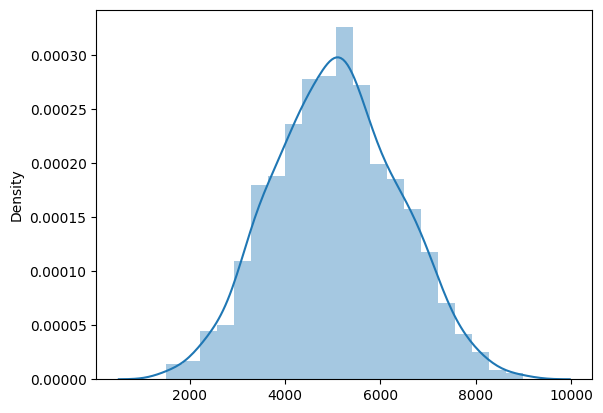

In [9]:
sns.distplot(x=df['Total_Premium_Paid'])
plt.show()

In [10]:
print(df['Total_Premium_Paid'].skew())  

0.06609074750847539


not a issue with skewness, it is normally distributed

 When to Keep **Outliers?** ✅ K-Means

Outliers can distort centroids because K-Means minimizes squared distances.

But if you scale the data (standardization), it can reduce the impact of outliers.

✅ DBSCAN (Density-Based Clustering)

Automatically detects outliers as noise points.

No need to remove them manually.

✅ Agglomerative (Hierarchical) Clustering

Works well even with outliers since it doesn't rely on centroids.

🔍 **Conclusion**

❌ No need to remove outliers manually.

✅ Scaling is important to reduce outlier impact in K-Means. ✅ DBSCAN handles outliers automatically


In [11]:
numerical_columns = df.select_dtypes(include=['int','Float64']).columns
print(numerical_columns)

Index(['Age', 'Annual_Income', 'Policy_Count', 'Total_Premium_Paid',
       'Claim_Frequency', 'Policy_Upgrades'],
      dtype='object')


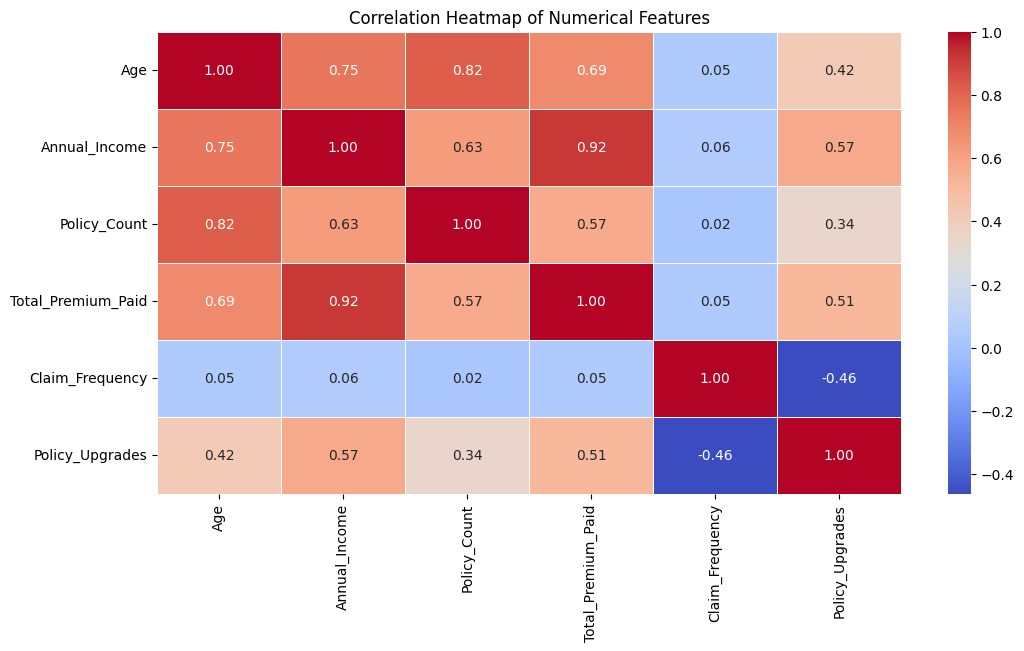

In [12]:
plt.figure(figsize=(12, 6))

# Create the heatmap with correlation values
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Show the plot
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# SCALING 

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
df.head()

,Customer_ID,Age,Annual_Income,Policy_Count,Total_Premium_Paid,Claim_Frequency,Policy_Upgrades
0,CUST_0001,56,106585.67,4,6382.37,2,3
1,CUST_0002,69,88833.21,5,5206.88,3,1
2,CUST_0003,46,93302.98,4,5567.50,3,3
3,CUST_0004,32,56374.84,3,3971.07,0,3
4,CUST_0005,60,79587.81,5,3728.49,0,3


In [6]:
#Corrected Code for Scaling Both Columns at Once

from sklearn.preprocessing import StandardScaler
import joblib
# Select columns to scale
columns_to_scale = ["Annual_Income", "Total_Premium_Paid"]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform both columns at once
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])







In [ ]:
# Save the scaler for future use
import joblib
joblib.dump(scaler, r'..\Models\5_scaler_unsupervised.pkl')

In [7]:
df

,Customer_ID,Age,Annual_Income,Policy_Count,Total_Premium_Paid,Claim_Frequency,Policy_Upgrades
0,CUST_0001,56,1.086088,4,1.003875,2,3
1,CUST_0002,69,0.343641,5,0.106306,3,1
2,CUST_0003,46,0.530577,4,0.381665,3,3
3,CUST_0004,32,-1.013839,3,-0.837321,0,3
4,CUST_0005,60,-0.043022,5,-1.022548,0,3
...,...,...,...,...,...,...,...
995,CUST_0996,18,-0.720353,1,-0.361342,1,2
996,CUST_0997,35,-0.470280,3,-0.865642,4,1
997,CUST_0998,49,-0.525986,3,-0.369192,2,2
998,CUST_0999,64,0.435638,5,0.946821,2,4


DIMENSIONALITY REDUCTION WITH PCA

Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

Dimensionality reduction with PCA

For this project, I will be reducing the dimensions to 3.

PCA works with numerical data

It relies on variance and Euclidean distance, which don't make sense for categorical values.

Categorical values (even after Label Encoding) don't have a meaningful numerical relationship.(so only we have changed the multiclass categorical to binary categorica)

In [8]:
from sklearn.decomposition import PCA

Choosing the right number of principal components (n_components) in PCA depends on how much variance you want to retain. Here’s how to decide:

📌 1. Check Explained Variance (Scree Plot Method)

A Scree Plot shows how much variance each principal component captures.

In [9]:
df_filtered = df.iloc[:, 1:]  # Keeps all columns except the first one
print(df_filtered.head())

   Age  Annual_Income  Policy_Count  Total_Premium_Paid  Claim_Frequency  \
0   56       1.086088             4            1.003875                2   
1   69       0.343641             5            0.106306                3   
2   46       0.530577             4            0.381665                3   
3   32      -1.013839             3           -0.837321                0   
4   60      -0.043022             5           -1.022548                0   

   Policy_Upgrades  
0                3  
1                1  
2                3  
3                3  
4                3  


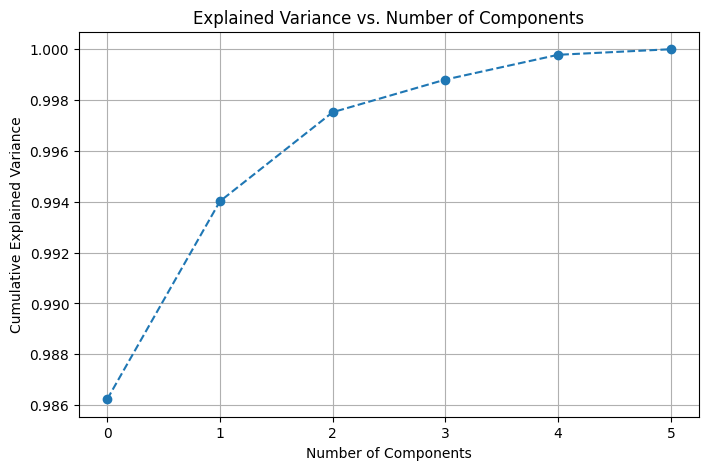

you should select n_components based on the "elbow point"

From the graph:

The cumulative explained variance rapidly increases up to 2 components (≈ 0.994).

After 3 components, the increase slows down, and by 4-5 components, it is nearly 1.

Optimal Choice:

If you want minimal components while preserving most variance, choose n_components = 2 or 3.

If you want to keep almost 100% variance, choose n_components = 4 or 5.

Recommendation: **n_components = 3** seems like a good balance based on the diminishing gain pattern.

In [10]:
pca = PCA(n_components=3)

In [11]:
PCA_df = pd.DataFrame(pca.fit_transform(df_filtered), columns=(["col1","col2", "col3"]))

In [38]:
import joblib

In [24]:
PCA_df.to_csv(r'..\Data\5_pca_unsupervised_data.csv')

In [39]:
joblib.dump(pca,r'..\Models\5_PCA_unsupervised.pkl')

['..\\Models\\5_PCA_unsupervised.pkl']

In [27]:
PCA_df=pd.read_csv(r'..\Data\5_pca_unsupervised_data.csv')
del PCA_df['Unnamed: 0']

In [28]:
PCA_df.head()

,col1,col2,col3
0,6.253861,-0.587985,1.105569
1,19.138386,1.839511,-0.964467
2,-3.758136,0.084050,1.525372
3,-17.882281,-2.337386,-0.542886
4,10.155913,-1.791969,-1.769182


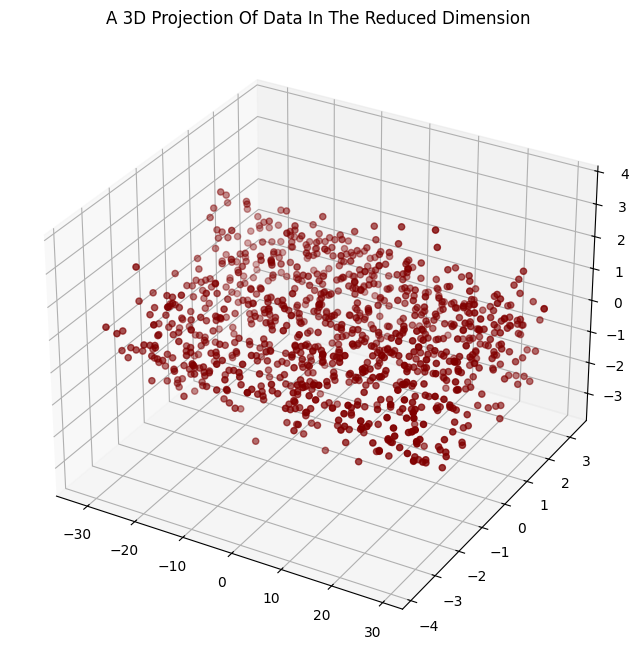

In [26]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_df["col1"]
y =PCA_df["col2"]
z =PCA_df["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# CLUSTERING

# K-MEANS


Elbow Method to determine the number of clusters to be formed

In [27]:

pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [28]:

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

Elbow Method to determine the number of clusters to be formed:


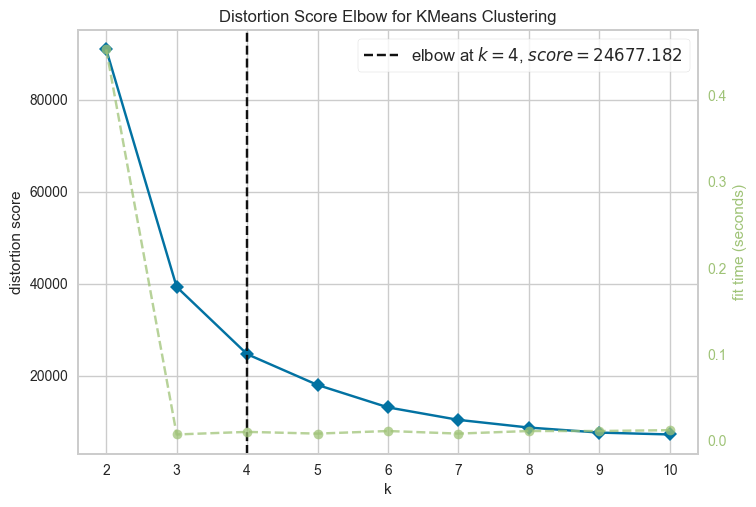

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

elbow at k=4

K-Means Clustering on PCA Data (n_clusters=4)

In [29]:

from sklearn.cluster import KMeans
pca_features = PCA_df.iloc[:, :3]  # Assuming the first 3 columns are PC1, PC2, PC3

# Apply K-Means with k=3
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pca_features)  # Assign cluster labels

# Add cluster labels to DataFrame
PCA_df['Cluster4'] = clusters

loading k-means

In [36]:
import joblib

In [37]:
joblib.dump(kmeans,r'..\Models\5_Kmeans_Unsupervised.pkl')

['..\\Models\\5_Kmeans_Unsupervised.pkl']

In [30]:
PCA_df['Cluster4'].value_counts()

Cluster4
1    291
3    252
0    243
2    214
Name: count, dtype: int64

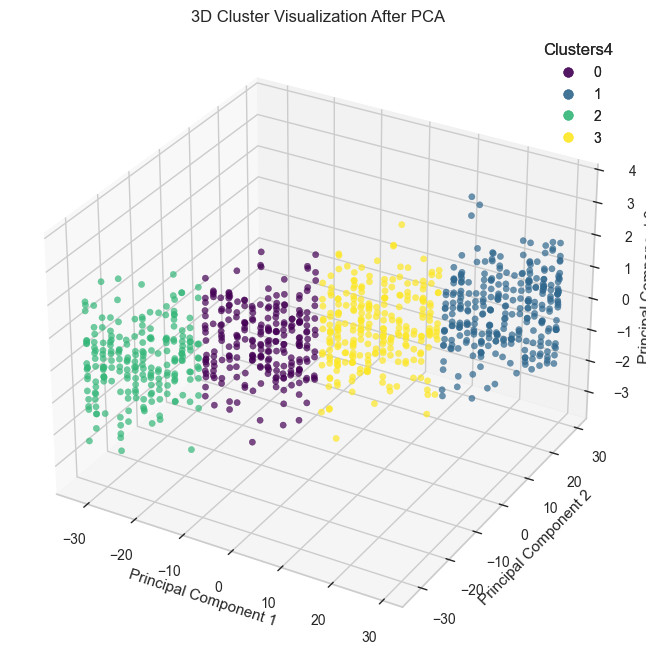

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract PCA components
x = PCA_df["col1"]
y = PCA_df["col1"]
z = PCA_df["col3"]

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(x, y, z, c=PCA_df["Cluster4"], cmap="viridis", marker="o", alpha=0.7)

# Labels and title
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D Cluster Visualization After PCA")

# Add legend
legend = ax.legend(*scatter.legend_elements(), title="Clusters4")
ax.add_artist(legend)

plt.show()

Each point represents a customer in the dataset.

Colors indicate different clusters.

You can interpret clusters based on their characteristics


Evaluate Clustering with **Silhouette Score**

In [35]:

from sklearn.metrics import silhouette_score
pca_features = PCA_df.iloc[:, :3]  # Assuming the first 3 columns are PC1, PC2, PC3

# Compute Silhouette Score
silhouette_avg = silhouette_score(pca_features, clusters)
print(f"Silhouette Score for k=3: {silhouette_avg:.4f}")

Silhouette Score for k=3: 0.5303


Interpret Results Silhouette Score > 0.5 → Clusters are well-separated. ✅

Silhouette Score between 0.3 - 0.5 → Some overlap between clusters. ⚠️

Silhouette Score < 0.3 → Poor clustering. ❌

silhouette score for k-means (n_Components=4) is good 

#  Agglomerative Clustering

In [1]:
from sklearn.cluster import AgglomerativeClustering

In [32]:
PCA_df.head()

,col1,col2,col3,Cluster4
0,6.253861,-0.587985,1.105569,3
1,19.138386,1.839511,-0.964467,1
2,-3.758136,0.084050,1.525372,0
3,-17.882281,-2.337386,-0.542886,2
4,10.155913,-1.791969,-1.769182,3


In [37]:

pca_features = PCA_df.iloc[:, :3]  # Assuming the first 3 columns are PC1, PC2, PC3
# Perform Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4, linkage='ward')  # Adjust clusters as needed
df['Cluster_agg'] = agglo.fit_predict(pca_features)

SCORE

In [38]:
from sklearn.metrics import silhouette_score

In [39]:
silhouette_avg = silhouette_score(pca_features, df['Cluster_agg'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5078742266147542


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\firea\AppData\Local\Temp\ipykernel_10472\2572762430.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=df['Cluster_agg'], palette= pal)


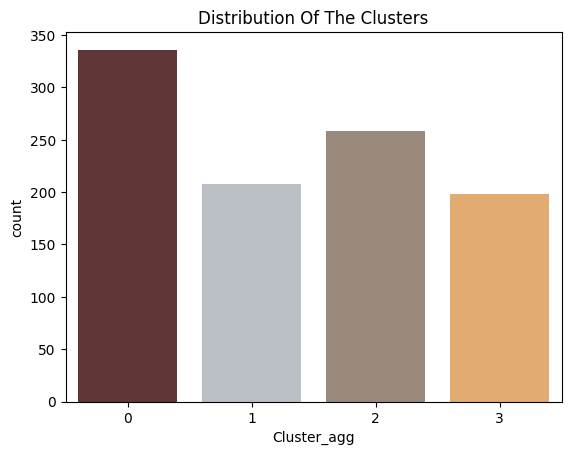

In [45]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df['Cluster_agg'], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

DBSCAN CLUSTERING

'--------

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
✅ It does not require specifying the number of clusters (k). ✅ It can identify outliers as noise points. ✅ It works well for non-spherical clusters and uneven densities.

1️⃣ Choosing Parameters for DBSCAN DBSCAN has two key parameters:

eps: Defines how close points should be to be considered part of the same cluster.

min_samples: The minimum number of points needed to form a dense region.

To determine the best eps, use the k-distance plot:

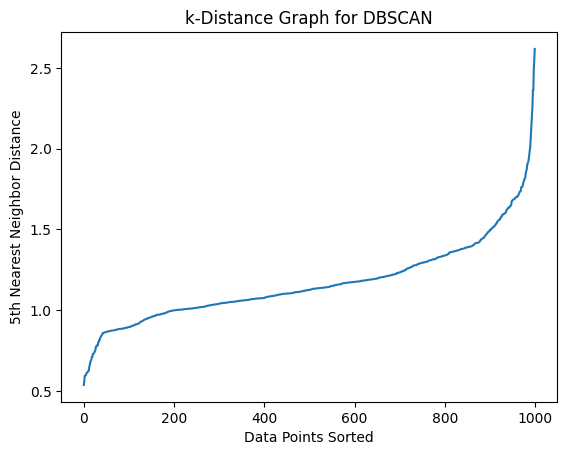

In [46]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
pca_features = PCA_df.iloc[:, :3]  # Assuming the first 3 columns are PC1, PC2, PC3

# Fit Nearest Neighbors model
neigh = NearestNeighbors(n_neighbors=5)  # 5 is a rule of thumb
neigh.fit(pca_features)
distances, _ = neigh.kneighbors(pca_features)

# Sort and plot the distances of the 5th nearest neighbor
distances = np.sort(distances[:, 4])  # 4 because index starts at 0
plt.plot(distances)
plt.xlabel("Data Points Sorted")
plt.ylabel("5th Nearest Neighbor Distance")
plt.title("k-Distance Graph for DBSCAN")
plt.show()

📌 Choose eps where the curve has a steep increase (elbow point). eps=0.7

In [47]:
from sklearn.cluster import DBSCAN

# Set `eps` based on the k-distance graph
dbscan = DBSCAN(eps=0.7, min_samples=5)  # Adjust values based on data

# Fit and predict cluster labels
labels = dbscan.fit_predict(pca_features)

# Add cluster labels to dataframe
pca_features["DBSCAN_Cluster"] = labels

3️⃣ Visualizing DBSCAN Clusters (3D PCA Projection)

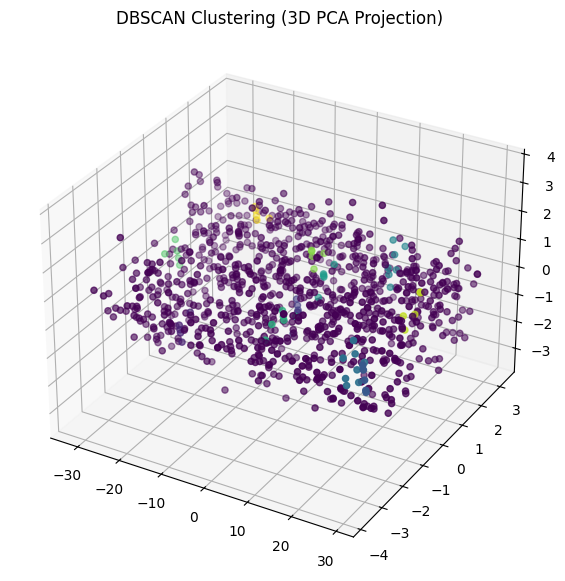

In [48]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with cluster colors
ax.scatter(pca_features["col1"], pca_features["col2"], pca_features["col3"],
           c=labels, cmap='viridis', marker='o')

ax.set_title("DBSCAN Clustering (3D PCA Projection)")
plt.show()

In [ ]:
# Compute Silhouette Score (only if multiple clusters exist)
unique_clusters = set( pca_features['DBSCAN_Cluster']) - {  1}  # Exclude noise (-1)

if len(unique_clusters) > 1:
    silhouette_avg = silhouette_score(pca_features, pca_features['DBSCAN_Cluster'])
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("Silhouette Score cannot be computed as there is only one cluster or excessive noise.")


Silhouette Score: -0.616422272667503


# FUTURE PREDICTION

In [ ]:
import joblib
import numpy as np
import pandas as pd

# Load the saved models
scaler = joblib.load(r"..\Models\5_scaler_unsupervised.pkl")  # StandardScaler for selected columns
pca = joblib.load(r"..\Models\5_PCA_unsupervised.pkl")  # PCA model
kmeans = joblib.load(r"..\Models\5_Kmeans_Unsupervised.pkl")  # Trained KMeans model

# Define function for future prediction
def predict_customer_cluster(age, annual_income, policy_count, total_premium_paid, claim_frequency, policy_upgrades):
    # Create DataFrame for new input
    new_data = pd.DataFrame([[age, annual_income, policy_count, total_premium_paid, claim_frequency, policy_upgrades]],
                            columns=["Age", "Annual_Income", "Policy_Count", "Total_Premium_Paid", "Claim_Frequency", "Policy_Upgrades"])

    # Scale only the necessary columns (Annual_Income & Total_Premium_Paid)
    new_data[["Annual_Income", "Total_Premium_Paid"]] = scaler.transform(new_data[["Annual_Income", "Total_Premium_Paid"]])

    # Apply PCA transformation
    new_data_pca = pca.transform(new_data)

    # Predict cluster using KMeans
    cluster_label = kmeans.predict(new_data_pca)[0]

    return cluster_label

# Example Prediction
predicted_cluster = predict_customer_cluster(56, 106585.67, 4, 6382.37, 2, 3)
print(f"Predicted Customer Cluster: {predicted_cluster}")


Predicted Customer Cluster: 3


d:\Projects\AI_POWERED_INSURANCE_SUITE\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [50]:
scaled_ds

,Annual_Income,Total_Premium_Paid
0,1.086088,1.003875
1,0.343641,0.106306
2,0.530577,0.381665
3,-1.013839,-0.837321
4,-0.043022,-1.022548
...,...,...
995,-0.720353,-0.361342
996,-0.470280,-0.865642
997,-0.525986,-0.369192
998,0.435638,0.946821


If clustering isn't clear, consider increasing n_components to 4 or trying t-SNE or UMAP for better separation.

t-SNE and UMAP are dimensionality reduction techniques like PCA but are more effective for visualizing high-dimensional data and preserving local/global structure.

t-SNE (t-Distributed Stochastic Neighbor Embedding)
✅ Best for: Visualizing clusters in high-dimensional data (e.g., customer segmentation, NLP, image data).
✅ Strengths:

Captures nonlinear relationships

Preserves local structure (similar points stay close)
✅ Limitations:

Computationally expensive (slow for large datasets)

Not good for new data predictions (only for visualization)

Can look different each time due to randomness

UMAP (Uniform Manifold Approximation and Projection)
✅ Best for: Both visualization & feature reduction (like PCA but preserves more structure).
✅ Strengths:

Faster than t-SNE

Works well with high-dimensional structured data (text, images, graphs)

Can be used for new data predictions (unlike t-SNE)